<a href="https://colab.research.google.com/github/Gianuzzi/Proc_de_Img_-DD2020/blob/main/Ejercicio2.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libs (no tocar)
import os
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    from subprocess import getoutput
    getoutput("git clone -l -s https://gist.github.com/Gianuzzi/8500100a094ade398c55b827e55c6a3a cloned-repo")
    os.chdir('cloned-repo')
    import libs_PI
    os.chdir('/content')
    
from libs_PI import *

# Carga de imagen

Se debe otorgar el ``path`` al archivo. Puede ser un path del ordenador, o la URL de la imagen.

- En caso de que sea una URL, debe estar permitido el acceso a ella; de caso contrario, surgirá un error [HTTP_403](https://es.wikipedia.org/wiki/HTTP_403)
    - En el extraño caso que la imagen de la WEB no esté en formato png, jpg (o derivados), de debe especificar en ``formato``.


- En caso de que sea un path del ordenador, este debe sel el nombre completo. Ej. ``foto.bmp``)


Si se quiere guardar la imagen (luego de descargarla), se puede otorgar un nombre en ``d_name``.

- Si es un _string_ (nombre), este debe incluir el formato del archivo a guardar. Ej. ``foto.png``.

- Si se setea como cualquier otra cosa, se guardará el archivo como ``Imagen.jpg``



In [2]:
# Definir path 
path    = 'https://img.ti-media.net/wp/uploads/sites/46/2018/06/pride-month-920x563.jpg'
formato = None
d_name  = None

# Carga (NO TOCAR)
if in_colab: d_name = None
img = ReadIMG(path, formato=formato, d_name=d_name)

## Visualización y normalización

Se normaliza la imagen.
Tamaño de la imagen: (563, 920, 3)


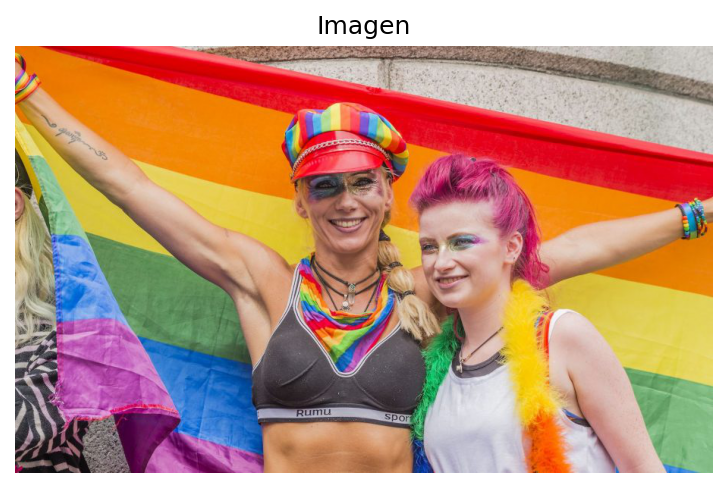

In [3]:
# Definimos RGB normalizado
if img.ravel().dtype not in (float, 'float32'): 
    print('Se normaliza la imagen.')
    img = img / 255.
if (len(img.shape)==3) and (img.shape[2]==4):
    img = RGBAtoRGB(img, verb=True)
print('Tamaño de la imagen:', img.shape) 

# Luminancias?
lum  = True if len(img.shape)==2 else False
if lum: print('Parece que la imagen no presenta colores.\n'+\
              'Se considera que es una imagen de luminancias.')
    
# Ploteo
plt.figure(dpi=150)
plt.title('Imagen')
plt.axis('off')
plt.imshow(img, plt.cm.gray)
plt.show()

# Cambio de tamaño

    Parámetros:
    ----------
        new_shape : Tamaño nuevo de la imagen buscada. 
                     Puede ser una tupla/lista/array con 2
                     elementos (Alto, Ancho) correspondientes
                     al tamaño nuevo, o puede ser un escalar
                     correspondiente al factor de multiplicación
                     de tamaño de la imagen original. También
                     puede ser un string de con formato 'x{factor}'
                     (anteponiendo una x al factor). [Default='x1']
                     Ej: new_shape = [10, 7] # Tamaño nuevo: (10, 7)
                     Ej: new_shape = 1.5     # Tamaño nuevo: tamaño viejo * 1.5 
                     Ej: new_shape = 'x0.4'  # Tamaño nuevo: tamaño viejo * 0.4
                     (int, float, tuple, np.ndarray, str)
        method    : Método a utlizar.
                     Los disponibles son:
                     - 'nn', 'nearest', 'cercanos', 'vc'          # Vecinos cercanos
                     - 'linear', 'bilinear', 'lineal', 'bilineal' # Bilineal
                     - 'cubic', 'bicubic', 'cubico', 'bicubico'   # Bicúbico
                    (str)
        sp        : Utilizar el paquete de scipy.interpolate para
                     realizar las interpolaciones. Caja negra,
                     pero puede ser más rápido. (bool)
                     (En caso de realizaar una interpolación
                     bicúbica, sp debe ser True, ya que la 
                     implementación manual aún no está terminada.)
        verb      : Imprimir mensajes. (bool)

Tamaño original de la imagen:  (563, 920)
Tamaño final de la imagen   :  (619, 1012)
Método de interpolación utilizado:  bicubic
Se utiliza el paquete de SciPy.


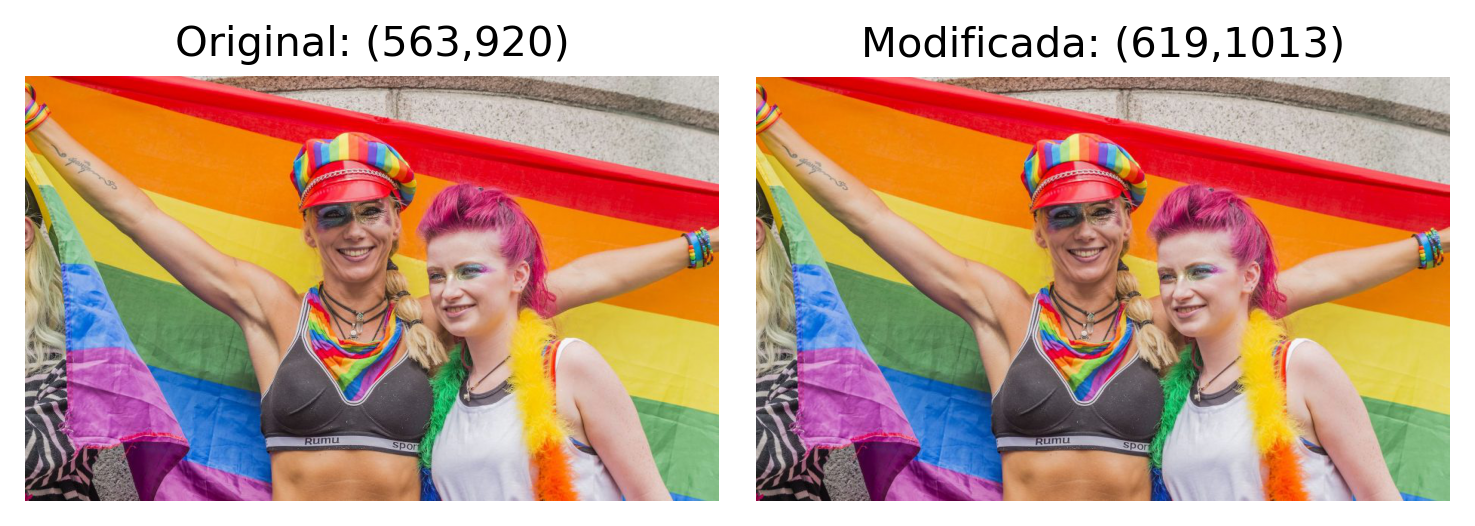

In [4]:
# Parámetros (Modificar a gusto)
new_shape = 1.1
method    = 'bicubic'
sp        = True


# NO TOCAR
img_e = ApplyManual_Resize(img, sp=sp,
            new_shape=new_shape, method=method)

## Plot
plt.figure(dpi=250)
plt.subplot(1,2,1)
plt.title('Original: ({},{})'.format(
    img.shape[0], img.shape[1]))
plt.imshow(img, plt.cm.gray)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Modificada: ({},{})'.format(
    img_e.shape[0], img_e.shape[1]))
plt.imshow(img_e, plt.cm.gray)
plt.axis('off')
plt.tight_layout()
plt.show()

# Guardado

In [5]:
nombre  = 'IMG_E_Ej2.3'
formato = 'jpg'

if not in_colab:
    plt.imsave(nombre+'.'+formato,
               (img_e*255).astype('uint8'),
               cmap=plt.cm.gray)

# Cuantización

Se realizará la cuantización de la imagen.

En caso que esta posea colores, se establecen los niveles segun las luminancias,
y luego estos se utilizan para cada componente RGB. (Y así las 3 componentes
tendrán los mismos *n* niveles.


    Parámetros:
    levels : Cantidad de niveles a generar. Puede ser un array, lista o tupla
              con los niveles a utilizar. (int/ndarray)
              [Default=None]
    method : Método a utilizar para generar los niveles (si no fueron dados). (str)
              Los métodos disponibles son:
               - 'uniforme', 'uniform'
               - 'no_uniforme', 'non_uniform' 
               - 'modas', 'modes', 'populosity'
               - 'cuantiles', 'quantiles'
               - 'medianas', 'median_cut'   
               - 'medianas2', 'median_cut2' (obliga igual cantidad de px por nivel)
              [Default=uniforme]
    y0     : Valor inicial en caso de seleccionar method=='no_uniforme'. 
              Este método elabora niveles siguiendo la paradoja de Aquiles y 
              la tortuga (siempre la mitad de lo que le falta), incluyendo al
              principio y al final, y arrancando en y0. (float)
              [Default=0.5]
    error  : Método a utilizar para intentar reducir el error de cuantización. (str)
              Los métodos disponibles son:
               - 'scan_line'
               - 'scan_row'
               - 'aleatorio', 'dithering_aleatorio', 'random_dithering'
               - '2d'
               - 'floyd_steinberg_dithering', 'fs_dithering'
               - 'minimized average error', 'mae', 'jjn_dithering'
               - None
              [Default=None]
    thresh : Valor a utilizar como semillar de error en caso de de seleccionar
              error=='scan_line' o error=='scan_row'. (float)
              [Default=0]
    rescale: Si rescale==True, entonces al finalizar la cuantización se
              rescalan artificialmente los niveles obtenidos a distribución
              uniforme. (bool)
              [Default=False]

Aplicando cuantización en luminancias, para obtener los niveles adecuados.
Aplicando cuantización de imagen a 8 niveles.
Los niveles se configuraron por método: uniforme
Aplicando cuantización en R.
Aplicando cuantización en G.
Aplicando cuantización en B.
Aplicando cuantización de imagen a 8 niveles.
Se utilizan los niveles introducidos.
Se aplica reducción de error por método: 2d


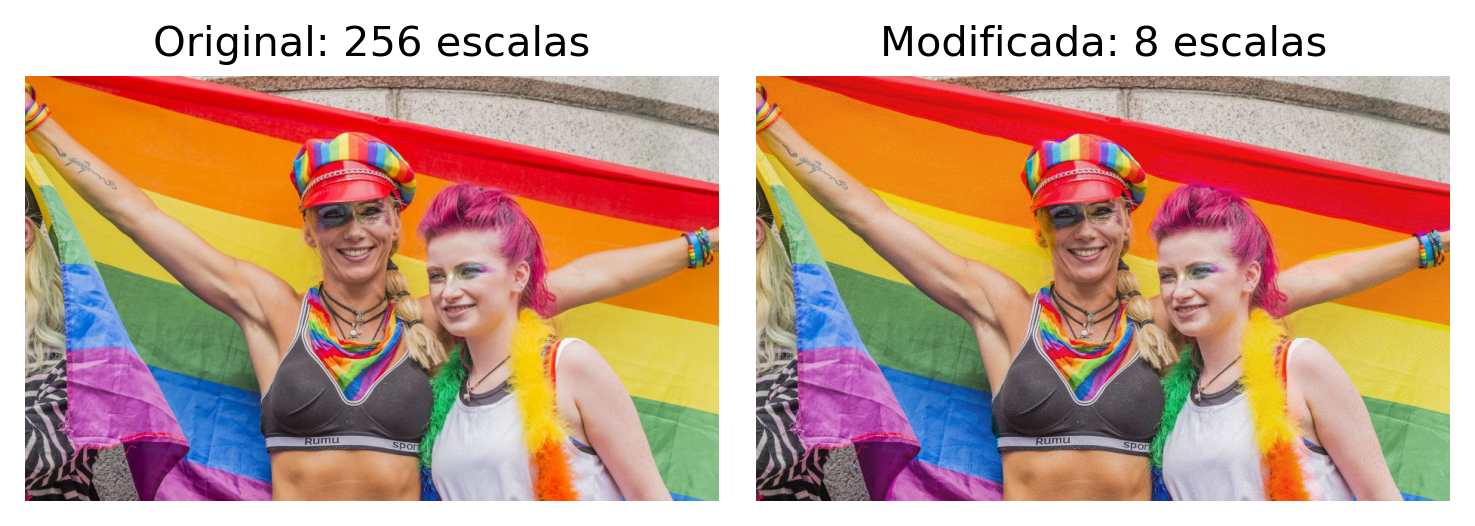

In [6]:
# Parámetros (Modificar a gusto)
levels  = 8
method  = 'uniforme'
y0      = 0.5      # sin uso, a menos que method=='no uniforme'
error   = '2d'
thresh  = 0.2      # sin uso, a menos que error=='scan_line' o error=='scan_row'
rescale = False


#N NO TOCAR
img_c = ApplyCuantizador(img, levels, method, y0, error, thresh, rescale, True)

## Plot
plt.figure(dpi=250)
plt.subplot(1,2,1)
plt.title('Original: %i escalas' %(len(
    np.unique((img*255).astype(int)))))
plt.imshow(img, plt.cm.gray)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Modificada: %i escalas' %(len(
    np.unique((img_c*255).astype(int)))))
plt.imshow(img_c, plt.cm.gray)
plt.axis('off')
plt.tight_layout()
plt.show()

# Guardado

In [7]:
nombre  = 'IMG_C_Ej2.3'
formato = 'jpg'

if not in_colab:
    plt.imsave(nombre+'.'+formato,
               (img_c*255).astype('uint8'),
               cmap=plt.cm.gray)